# Normalization (MinMaxScaling)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
os.chdir('F:/datasets')

In [52]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2],names=['Class Label','Alcohol','Malic Acid'])
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\DELL\AppData\Local\Temp\ipykernel_25000\2036680901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'],hist=0) #or sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

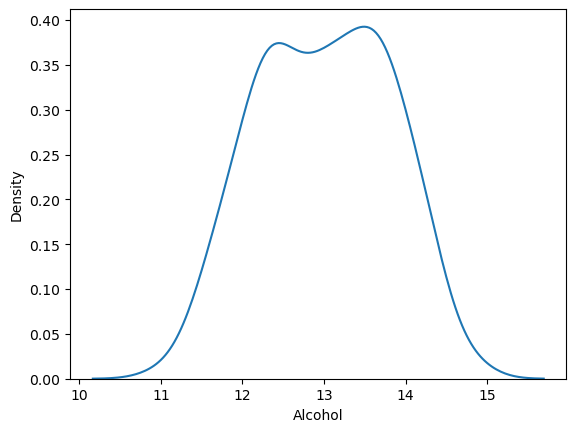

In [53]:
sns.distplot(df['Alcohol'],hist=0) #or sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

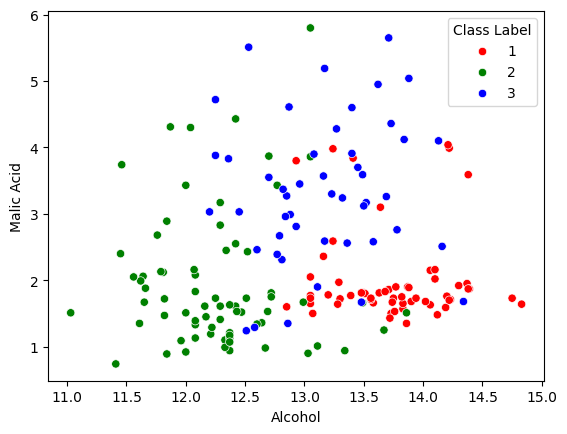

In [54]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class Label'],palette={1:'Red',2:'green',3:'BLUE'})

#### Train test split

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Alcohol','Malic Acid']], df['Class Label'],test_size=0.2,random_state=1)
X_train.shape,X_test.shape

((142, 2), (36, 2))

#### Model prediction

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit the train data
scaler.fit(X_train)
#transform train and test data
X_train_transform=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_transform=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test_transform
model = LogisticRegression()
model.fit(X_train_transform, y_train)
y_pred = model.predict(X_test_transform)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8611111111111112

#### Compare before minmax scaling and after it

In [57]:
X_train.describe()

,Alcohol,Malic Acid
count,142.000000,142.000000
mean,12.992465,2.403662
std,0.803806,1.169124
min,11.030000,0.900000
25%,12.347500,1.592500
50%,13.050000,1.875000
75%,13.660000,3.222500
max,14.830000,5.800000


In [58]:
X_train_transform.describe() #the min value is 0 and max is 1 , no observation can be drawn on mean and std in minmax scaling

,Alcohol,Malic Acid
count,142.000000,142.000000
mean,0.516438,0.306870
std,0.211528,0.238597
min,0.000000,0.000000
25%,0.346711,0.141327
50%,0.531579,0.198980
75%,0.692105,0.473980
max,1.000000,1.000000


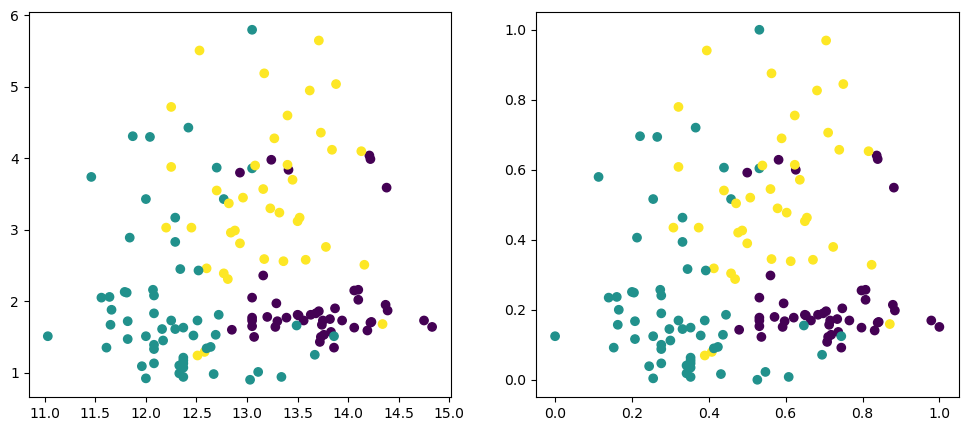

In [59]:
fig , (p1,p2)=plt.subplots(ncols=2, figsize=(12,5))
p1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train) # 'c' means that each unique value in y_train will be assigned a different color in the scatter plot.
p2.scatter(X_train_transform['Alcohol'],X_train_transform['Malic Acid'],c=y_train)
# the data is squished 

C:\Users\DELL\AppData\Local\Temp\ipykernel_25000\3740818779.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['Alcohol'],hist=0,ax=p1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25000\3740818779.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train['Malic Ac

<Axes: title={'center': 'After scaling'}, ylabel='Density'>

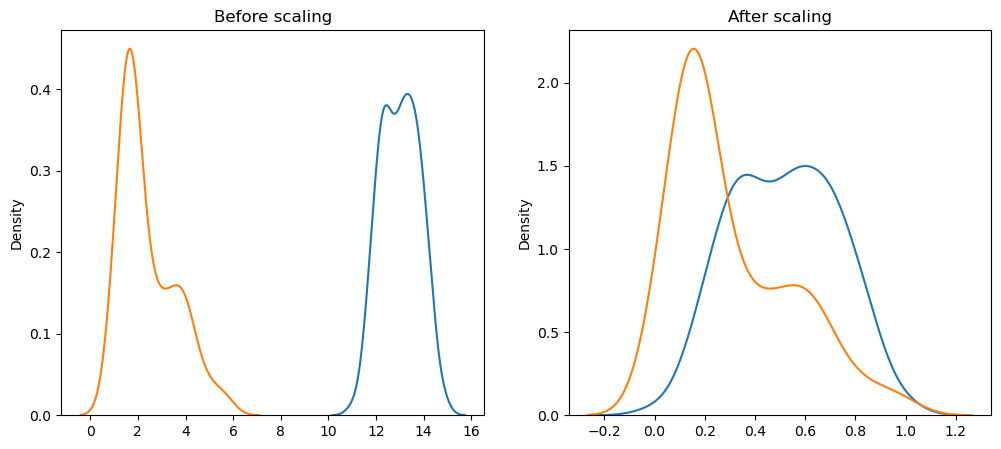

In [60]:
fig , (p1,p2)=plt.subplots(ncols=2, figsize=(12,5))
p1.set_title('Before scaling')
p2.set_title('After scaling')
sns.distplot(x=X_train['Alcohol'],hist=0,ax=p1)
sns.distplot(x=X_train['Malic Acid'],hist=0,ax=p1)
sns.distplot(x=X_train_transform['Alcohol'],hist=0,ax=p2)
sns.distplot(x=X_train_transform['Malic Acid'],hist=0,ax=p2)

# Normalization (MaxAbsScaler)

In [102]:
social = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2],names=['Class Label','Alcohol','Malic Acid'])
social.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [103]:
from sklearn.preprocessing import MaxAbsScaler
minmax = MaxAbsScaler()
#s_train,s_test,sy_train,sy_test=train_test_split(df[['Alcohol','Malic Acid']], df['Class Label'],test_size=0.2,random_state=1)
#s_train
minmax.fit(X_train)
social_train = pd.DataFrame(minmax.transform(X_train),columns=X_train.columns)
social_test = pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)
social_train.shape,social_test.shape

((142, 2), (36, 2))

In [106]:
model.fit(social_train,y_train)
social_y_pred=model.predict(social_test)
social_accuracy = accuracy_score(y_test,social_y_pred)
social_accuracy

0.6388888888888888

# Normalization (Robust Scaling)

In [99]:
from sklearn.preprocessing import RobustScaler
scal =RobustScaler()
scal.fit(X_train)
rob_train=pd.DataFrame(scal.transform(X_train),columns=X_train.columns)
rob_test=pd.DataFrame(scal.transform(X_test),columns=X_test.columns)
rob_train.shape, rob_test.shape

((142, 2), (36, 2))

In [105]:
model.fit(rob_train,y_train)
rob_y_pred=model.predict(rob_test)
social_accuracy = accuracy_score(y_test,rob_y_pred)
social_accuracy

0.8333333333333334